# Visualizing Company Sale data

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://github.com/thieu1995/csv-files/blob/main/data/matplotlib/company_sales_data.csv).

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/supermarket_sales.csv"
df = pd.read_csv(url)

### Exercise 1: Read Total profit of all months and show it using a line plot

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/01.png?raw=1)

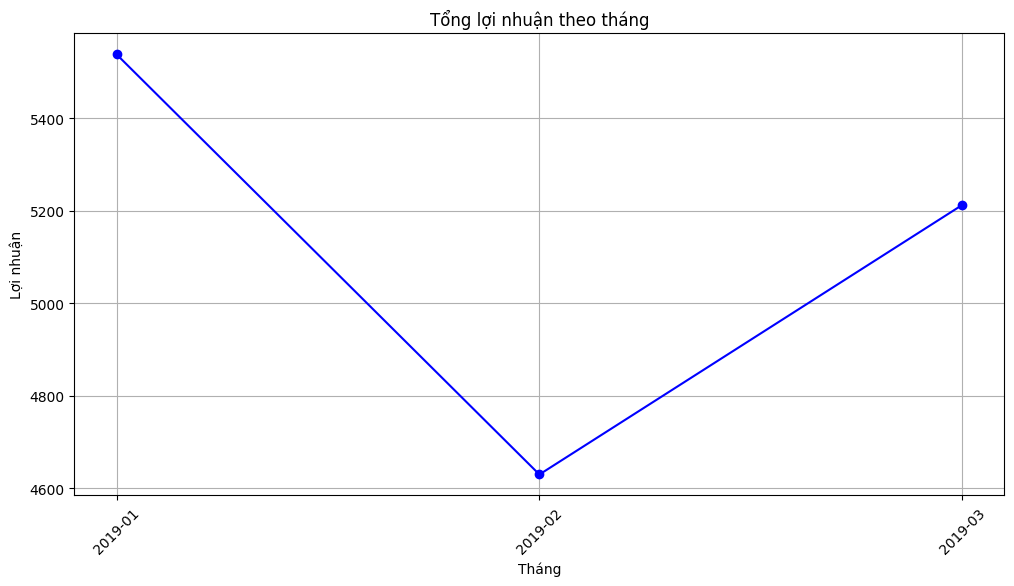

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%Y-%m')
monthly_profit = df.groupby('Month')['gross income'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit.index, monthly_profit.values, marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel("Tháng")
plt.ylabel("Lợi nhuận")
plt.title("Tổng lợi nhuận theo tháng")
plt.grid()
plt.show()

### Exercise 2: Get total profit of all months and show line plot with the following Style properties

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/02.png?raw=1)

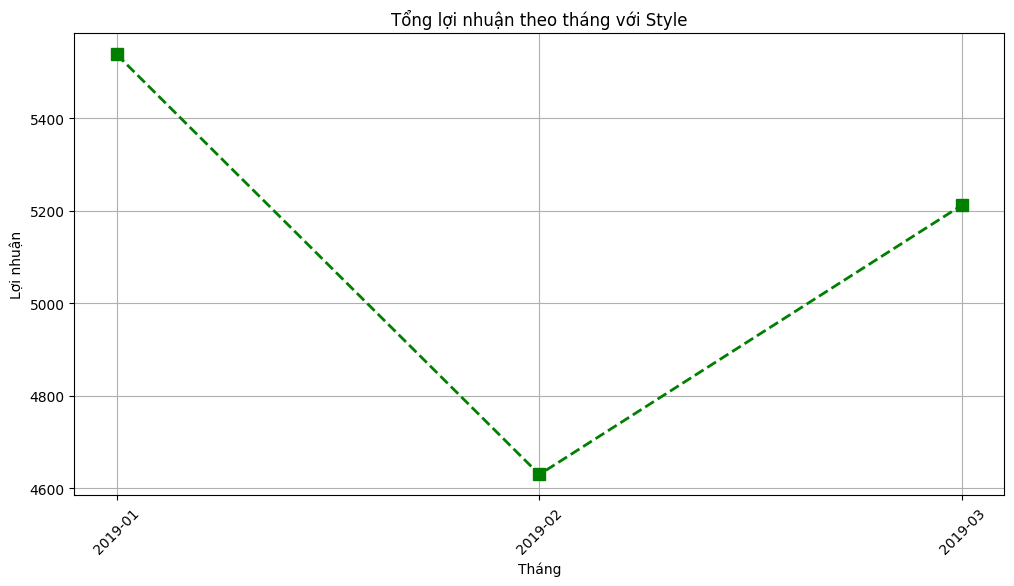

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit.index, monthly_profit.values, marker='s', linestyle='--', color='g', linewidth=2, markersize=8)
plt.xticks(rotation=45)
plt.xlabel("Tháng")
plt.ylabel("Lợi nhuận")
plt.title("Tổng lợi nhuận theo tháng với Style")
plt.grid()
plt.show()


### Exercise 3: Read all product sales data and show it  using a multiline plot

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/03.png?raw=1)

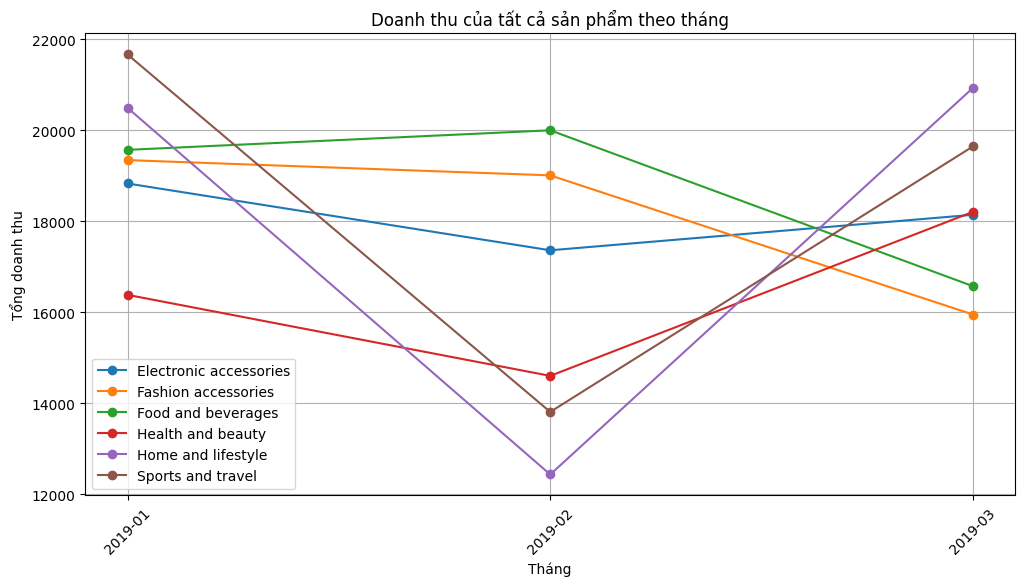

In [8]:
product_sales = df.groupby(['Month', 'Product line'])['Total'].sum().unstack()

plt.figure(figsize=(12, 6))
for product in product_sales.columns:
    plt.plot(product_sales.index, product_sales[product], marker='o', label=product)

plt.xticks(rotation=45)
plt.xlabel("Tháng")
plt.ylabel("Tổng doanh thu")
plt.title("Doanh thu của tất cả sản phẩm theo tháng")
plt.legend()
plt.grid()
plt.show()

### Exercise 4: Read toothpaste sales data of each month and show it using a scatter plot
![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/04.png?raw=1)

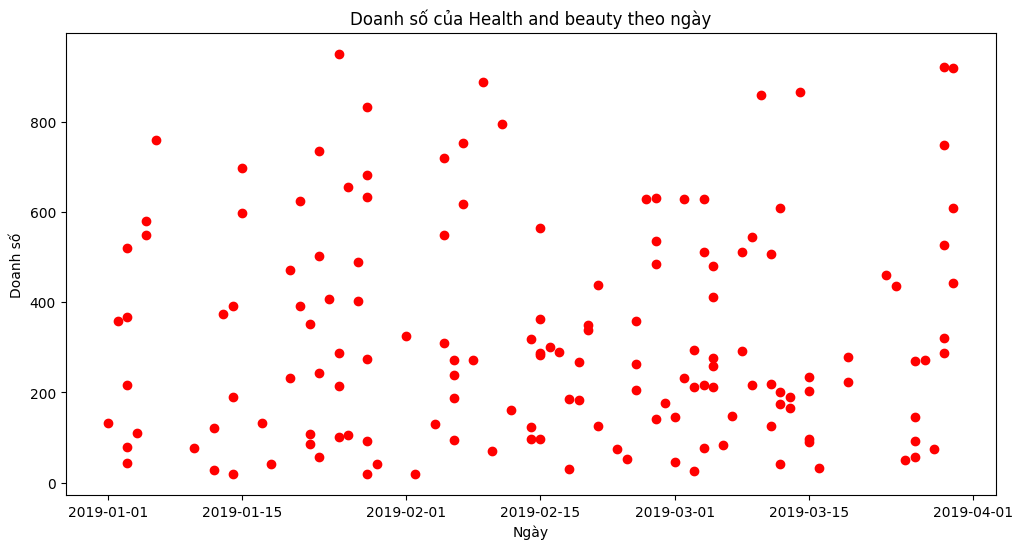

In [9]:
df_toothpaste = df[df['Product line'] == 'Health and beauty']
plt.figure(figsize=(12, 6))
plt.scatter(df_toothpaste['Date'], df_toothpaste['Total'], color='r')
plt.xlabel("Ngày")
plt.ylabel("Doanh số")
plt.title("Doanh số của Health and beauty theo ngày")
plt.show()

### Exercise 5: Read face cream and facewash product sales data and show it using the bar chart

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/05.png?raw=1)

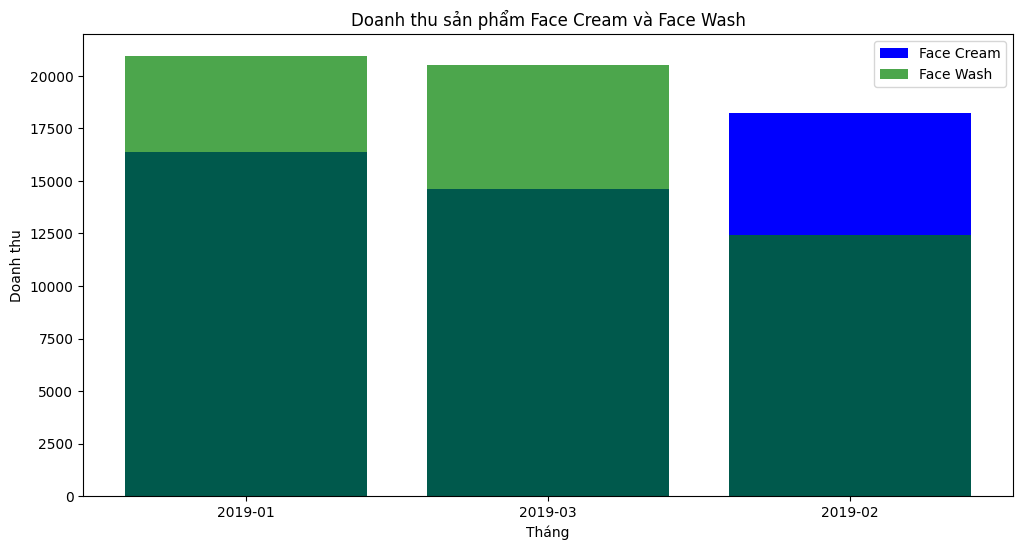

In [10]:
df_face_cream = df[df['Product line'] == 'Health and beauty']
df_facewash = df[df['Product line'] == 'Home and lifestyle']

plt.figure(figsize=(12, 6))
plt.bar(df_face_cream['Month'].unique(), df_face_cream.groupby('Month')['Total'].sum(), color='b', label='Face Cream')
plt.bar(df_facewash['Month'].unique(), df_facewash.groupby('Month')['Total'].sum(), color='g', label='Face Wash', alpha=0.7)
plt.xlabel("Tháng")
plt.ylabel("Doanh thu")
plt.title("Doanh thu sản phẩm Face Cream và Face Wash")
plt.legend()
plt.show()

### Exercise 6: Read sales data of bathing soap of all months and show it using a bar chart. Save this plot to your hard disk

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/06.png?raw=1)

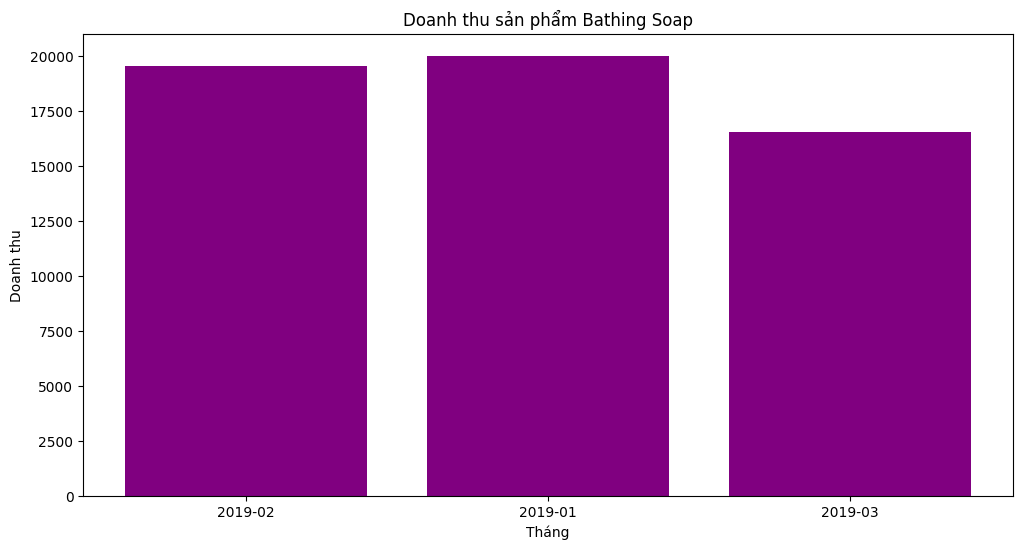

In [11]:
df_soap = df[df['Product line'] == 'Food and beverages']

plt.figure(figsize=(12, 6))
plt.bar(df_soap['Month'].unique(), df_soap.groupby('Month')['Total'].sum(), color='purple')
plt.xlabel("Tháng")
plt.ylabel("Doanh thu")
plt.title("Doanh thu sản phẩm Bathing Soap")
plt.savefig("bathing_soap_sales.png")
plt.show()

### Exercise 7: Read the total profit of each month and show it using the histogram to see the most common profit ranges

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/07.png?raw=1)

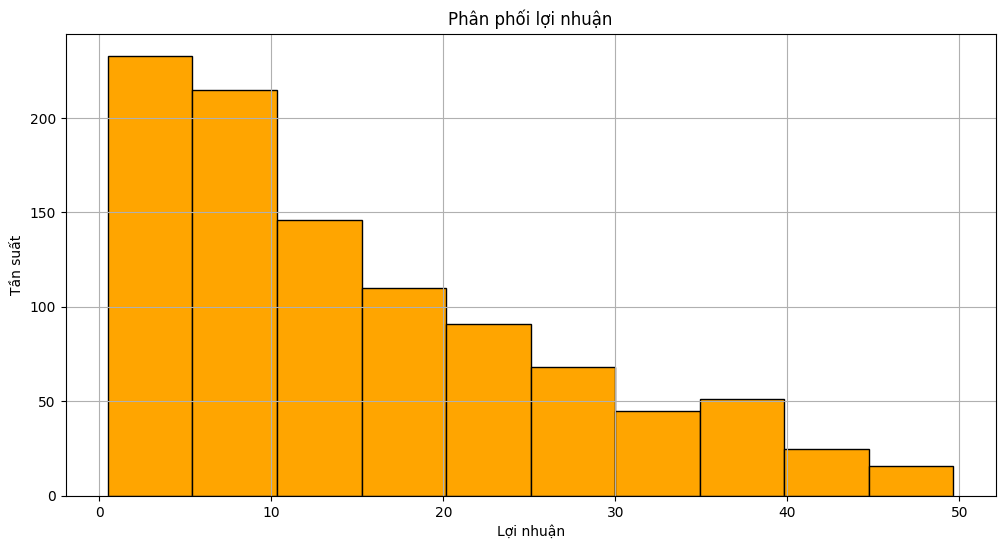

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(df['gross income'], bins=10, color='orange', edgecolor='black')
plt.xlabel("Lợi nhuận")
plt.ylabel("Tần suất")
plt.title("Phân phối lợi nhuận")
plt.grid()
plt.show()

### Exercise 8: Calculate total sale data for last year for each product and show it using a Pie chart

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/08.png?raw=1)

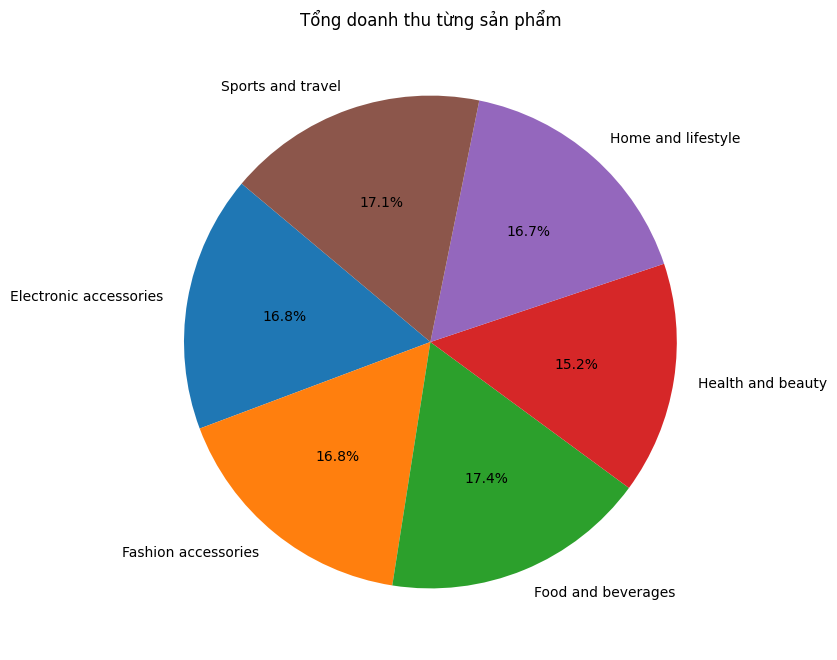

In [13]:
total_sales = df.groupby('Product line')['Total'].sum()
plt.figure(figsize=(8, 8))
plt.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Tổng doanh thu từng sản phẩm")
plt.show()

### Exercise 9: Read Bathing soap facewash of all months and display it using the Subplot

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/09.png?raw=1)

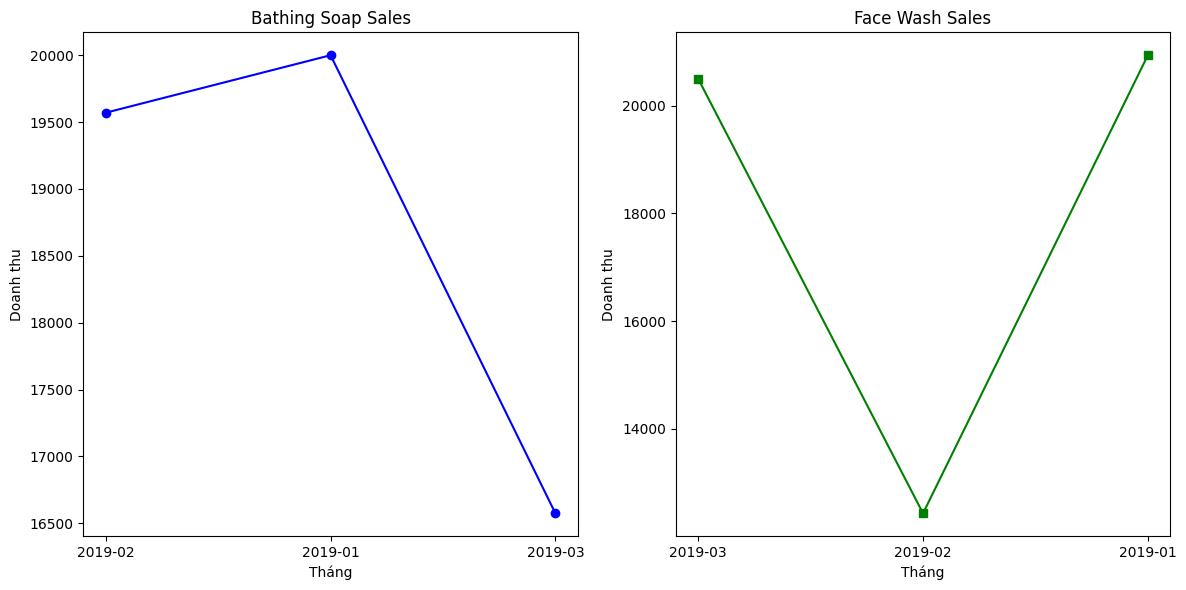

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(df_soap['Month'].unique(), df_soap.groupby('Month')['Total'].sum(), marker='o', color='b')
plt.title("Bathing Soap Sales")
plt.xlabel("Tháng")
plt.ylabel("Doanh thu")

plt.subplot(1, 2, 2)
plt.plot(df_facewash['Month'].unique(), df_facewash.groupby('Month')['Total'].sum(), marker='s', color='g')
plt.title("Face Wash Sales")
plt.xlabel("Tháng")
plt.ylabel("Doanh thu")

plt.tight_layout()
plt.show()

### Exercise 10: Read all product sales data and show it using the stack plot

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/10.png?raw=1)

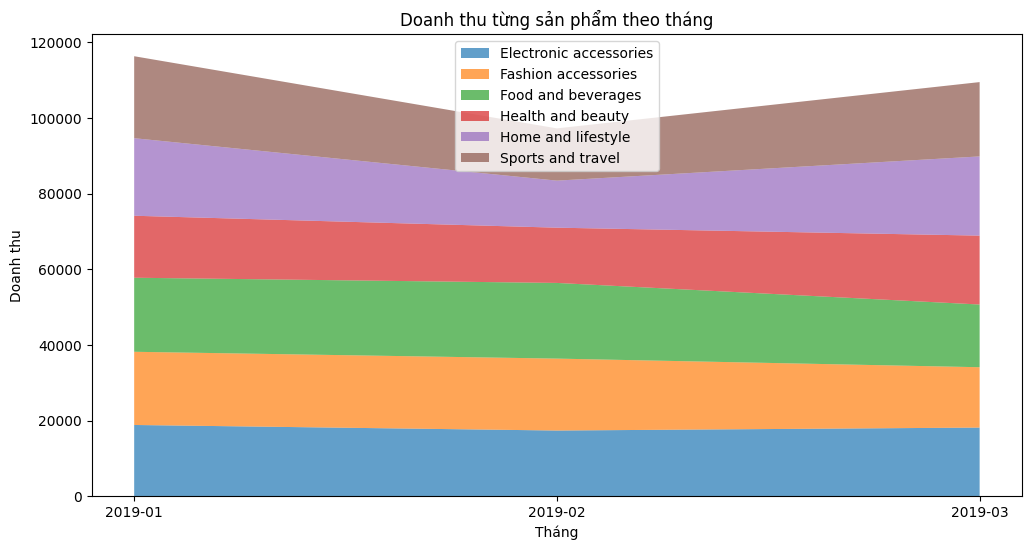

In [15]:
plt.figure(figsize=(12, 6))
plt.stackplot(product_sales.index, product_sales.T, labels=product_sales.columns, alpha=0.7)
plt.xlabel("Tháng")
plt.ylabel("Doanh thu")
plt.title("Doanh thu từng sản phẩm theo tháng")
plt.legend()
plt.show()

### Exercise 6: Read sales data of bathing soap of all months and show it using a bar chart. Save this plot to your hard disk

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/06.png?raw=1)

### Exercise 7: Read the total profit of each month and show it using the histogram to see the most common profit ranges

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/07.png?raw=1)

### Exercise 8: Calculate total sale data for last year for each product and show it using a Pie chart

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/08.png?raw=1)

### Exercise 9: Read Bathing soap facewash of all months and display it using the Subplot

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/09.png?raw=1)

### Exercise 10: Read all product sales data and show it using the stack plot

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/10.png?raw=1)

### Exercise 6: Read sales data of bathing soap of all months and show it using a bar chart. Save this plot to your hard disk

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/06.png?raw=1)

### Exercise 7: Read the total profit of each month and show it using the histogram to see the most common profit ranges

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/07.png?raw=1)

### Exercise 8: Calculate total sale data for last year for each product and show it using a Pie chart

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/08.png?raw=1)

### Exercise 9: Read Bathing soap facewash of all months and display it using the Subplot

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/09.png?raw=1)

### Exercise 10: Read all product sales data and show it using the stack plot

![img](https://github.com/thieu1995/pandas/blob/main/11_matplotlib/company-sale/img/10.png?raw=1)